# Fortnite Stats analyse

In this project, it is possible to compare and analyze the stats of two different Fortnite players side by side.

We retrieve the data from an API, and it prompts for 2 inputs.

In [91]:
import matplotlib.pyplot as plt
import requests
import numpy as np


api_key = 'a3f031a9-67fe-48b0-8438-260ddf04880e'
api_url = 'https://fortnite-api.com/v2/stats/br/v2'

def get_player_input(player_number):
    global player_input
    if player_number not in player_input:
        player_input[player_number] = input(f'Enter player {player_number} name: ')
    return player_input[player_number]


def get_player_stats(player_name):
    headers = {'Authorization': api_key}
    params = {'name': player_name}
    response = requests.get(api_url, headers=headers, params=params)

    if response.status_code == 200:
        data = response.json()
        overall_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('overall', {})
        solo_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('solo', {})
        duo_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('duo', {})
        squad_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('squad', {})
        return overall_stats, solo_stats, duo_stats, squad_stats
    else:
        print(f"Error calling the API for {player_name}. Status code: {response.status_code}")
        print(response.text)
        return None

def print_stats(stats, player_name, stat_names):
    for stat_name in stat_names:
        print_stat(stat_name, stats, player_name)


def print_stat(stat_name, stats, player_name):
    if stats and stat_name in stats:
        stat_value = stats[stat_name]
        print(f"Number of {stat_name} for {player_name}: {stat_value}")


def main():
    global player_input
    player_input = {}
    get_player_input(1)
    get_player_input(2)

    player1_name = player_input.get(1)
    player2_name = player_input.get(2)

    if player1_name and player2_name:
        player1_stats = get_player_stats(player1_name)
        player2_stats = get_player_stats(player2_name)

        if player1_stats and player2_stats:
            print("\nPlayer 1 Stats:")
            overall_stats, solo_stats, duo_stats, squad_stats = player1_stats

            print("\nOverall stats:")
            stat_names_overall = ['wins', 'top3', 'top5', 'top6', 'top10', 'top12', 'top25', 'kills', 'deaths', 'kd',
                                  'matches', 'minutesPlayed']
            print_stats(overall_stats, player1_name, stat_names_overall)

            print("\nSolo stats:")
            print_stats(solo_stats, player1_name, stat_names_overall)

            print("\nDuo stats:")
            print_stats(duo_stats, player1_name, stat_names_overall)

            print("\nSquad stats:")
            print_stats(squad_stats, player1_name, stat_names_overall)

            print("\nPlayer 2 Stats:")
            overall_stats, solo_stats, duo_stats, squad_stats = player2_stats

            print("\nOverall stats:")
            print_stats(overall_stats, player2_name, stat_names_overall)

            print("\nSolo stats:")
            print_stats(solo_stats, player2_name, stat_names_overall)

            print("\nDuo stats:")
            print_stats(duo_stats, player2_name, stat_names_overall)

            print("\nSquad stats:")
            print_stats(squad_stats, player2_name, stat_names_overall)

        else:
            print("Player information not available.")

if __name__ == "__main__":
    main()

{'score': 387491, 'scorePerMin': 11.167, 'scorePerMatch': 77.036, 'wins': 349, 'top3': 210, 'top5': 327, 'top6': 330, 'top10': 368, 'top12': 550, 'top25': 677, 'kills': 10907, 'killsPerMin': 0.314, 'killsPerMatch': 2.168, 'deaths': 4681, 'kd': 2.33, 'matches': 5030, 'winRate': 6.938, 'minutesPlayed': 34701, 'playersOutlived': 75647, 'lastModified': '2023-12-01T11:11:42Z'}
{'score': 1564108, 'scorePerMin': 19.255, 'scorePerMatch': 163.251, 'wins': 224, 'top3': 105, 'top5': 474, 'top6': 188, 'top10': 548, 'top12': 1042, 'top25': 1301, 'kills': 12810, 'killsPerMin': 0.158, 'killsPerMatch': 1.337, 'deaths': 9357, 'kd': 1.369, 'matches': 9581, 'winRate': 2.338, 'minutesPlayed': 81230, 'playersOutlived': 376839, 'lastModified': '2024-01-12T09:41:14Z'}

Player 1 Stats:

Overall stats:
Number of wins for Kiirbb_: 349
Number of top3 for Kiirbb_: 210
Number of top5 for Kiirbb_: 327
Number of top6 for Kiirbb_: 330
Number of top10 for Kiirbb_: 368
Number of top12 for Kiirbb_: 550
Number of top25 f

Above, you see the data from your 2 inputs, and we will further process it into a few visuals.

### Table Overall stats

We put the data in a nice table.

In [92]:
def print_overall_stats_table(overall_stats, player_name, stat_names):
    table = []
    table.append(f"{player_name} Stats:")
    for stat_name in stat_names:
        if overall_stats and stat_name in overall_stats:
            stat_value = overall_stats[stat_name]
            table.append(f"{stat_name}: {stat_value}")
    return table


def main():
    global player_input
    get_player_input(1)
    get_player_input(2)

    player1_name = player_input.get(1)
    player2_name = player_input.get(2)

    player1_stats = get_player_stats(player1_name)
    player2_stats = get_player_stats(player2_name)

    if player1_stats and player2_stats:
        stat_names_overall = ['wins', 'top3', 'top5', 'top6', 'top10', 'top12', 'top25', 'kills', 'deaths', 'kd', 'matches', 'winRate', 'minutesPlayed']

        table_p1 = print_overall_stats_table(player1_stats[0], player1_name, stat_names_overall)
        table_p2 = print_overall_stats_table(player2_stats[0], player2_name, stat_names_overall)

        print("\nOverall Stats Comparison:")
        for line_p1, line_p2 in zip(table_p1, table_p2):
            print(f"{line_p1.ljust(40)} {line_p2}")

    else:
        print("Player information not available.")


if __name__ == "__main__":
    main()

{'score': 387491, 'scorePerMin': 11.167, 'scorePerMatch': 77.036, 'wins': 349, 'top3': 210, 'top5': 327, 'top6': 330, 'top10': 368, 'top12': 550, 'top25': 677, 'kills': 10907, 'killsPerMin': 0.314, 'killsPerMatch': 2.168, 'deaths': 4681, 'kd': 2.33, 'matches': 5030, 'winRate': 6.938, 'minutesPlayed': 34701, 'playersOutlived': 75647, 'lastModified': '2023-12-01T11:11:42Z'}
{'score': 1564108, 'scorePerMin': 19.255, 'scorePerMatch': 163.251, 'wins': 224, 'top3': 105, 'top5': 474, 'top6': 188, 'top10': 548, 'top12': 1042, 'top25': 1301, 'kills': 12810, 'killsPerMin': 0.158, 'killsPerMatch': 1.337, 'deaths': 9357, 'kd': 1.369, 'matches': 9581, 'winRate': 2.338, 'minutesPlayed': 81230, 'playersOutlived': 376839, 'lastModified': '2024-01-12T09:41:14Z'}

Overall Stats Comparison:
Kiirbb_ Stats:                           Derve Xander Stats:
wins: 349                                wins: 224
top3: 210                                top3: 105
top5: 327                                top5: 474
top

The data has been neatly and systematically arranged in a clear manner!

### Clusterd barplot

Below, we will create a plot to study the players' performances.

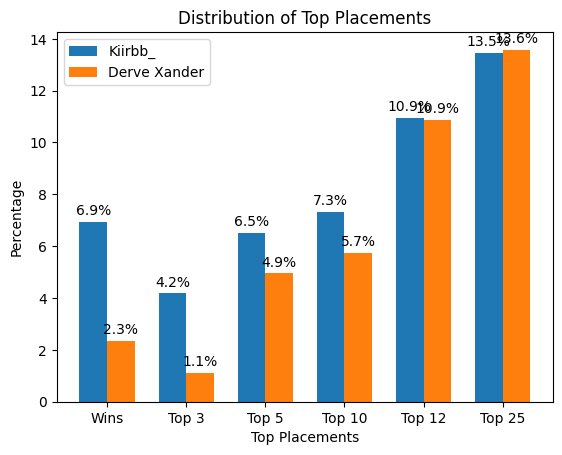

In [93]:
def get_player_input(player_number):
    global player_input
    if player_number not in player_input:
        player_input[player_number] = input(f'Enter player {player_number} name: ')
    return player_input[player_number]


def get_player_stats(player_name):
    headers = {'Authorization': api_key}
    params = {'name': player_name}
    response = requests.get(api_url, headers=headers, params=params)

    if response.status_code == 200:
        data = response.json()
        overall_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('overall', {})
        solo_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('solo', {})
        duo_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('duo', {})
        squad_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('squad', {})
        
        return overall_stats, solo_stats, duo_stats, squad_stats
    else:
        print(f"Error calling the API for {player_name}. Status code: {response.status_code}")
        print(response.text)
        return None


def get_top_placement_percentages(stats):
    if stats:
        overall_stats = stats[0]  # Assuming overall stats are the first element in the tuple
        overall_matches = overall_stats.get('matches', 0)
        overall_wins = overall_stats.get('wins', 0)

        overall_win_percentage = (overall_wins / overall_matches) * 100
        overall_top3_percentage = (overall_stats.get('top3', 0) / overall_matches) * 100
        overall_top5_percentage = (overall_stats.get('top5', 0) / overall_matches) * 100
        overall_top10_percentage = (overall_stats.get('top10', 0) / overall_matches) * 100
        overall_top12_percentage = (overall_stats.get('top12', 0) / overall_matches) * 100
        overall_top25_percentage = (overall_stats.get('top25', 0) / overall_matches) * 100

        # Calculate percentage outside top 25
        outside_top25_percentage = 100 - (
            overall_win_percentage + overall_top3_percentage + overall_top5_percentage +
            overall_top10_percentage + overall_top12_percentage + overall_top25_percentage
        )

        return (
            overall_win_percentage, overall_top3_percentage, overall_top5_percentage,
            overall_top10_percentage, overall_top12_percentage, overall_top25_percentage,
            outside_top25_percentage
        )
    else:
        return 0, 0, 0, 0, 0, 0, 0

def plot_cluster_bar_chart(ax, player1_name, player2_name, percentages1, percentages2):
    categories = ['Wins', 'Top 3', 'Top 5', 'Top 10', 'Top 12', 'Top 25']
    bar_width = 0.35
    index = np.arange(len(categories))

    bar1 = ax.bar(index, percentages1, bar_width, label=player1_name)
    bar2 = ax.bar(index + bar_width, percentages2, bar_width, label=player2_name)

    ax.set_xlabel('Top Placements')
    ax.set_ylabel('Percentage')
    ax.set_title('Distribution of Top Placements')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(categories)
    ax.legend()

    # Print percentages above the bars
    for bars, percentages, player_name in zip([bar1, bar2], [percentages1, percentages2], [player1_name, player2_name]):
        for bar, percentage in zip(bars, percentages):
            height = bar.get_height()
            ax.annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

def top_main():
    global player_input
    get_player_input(1)
    get_player_input(2)

    player1_name = player_input.get(1)
    player2_name = player_input.get(2)

    if player1_name and player2_name:
        player1_stats = get_player_stats(player1_name)
        player2_stats = get_player_stats(player2_name)

        if player1_stats and player2_stats:
            # Player 1
            percentages1 = get_top_placement_percentages(player1_stats)[:-1]  # Exclude 'Outside Top 25'

            # Player 2
            percentages2 = get_top_placement_percentages(player2_stats)[:-1]  # Exclude 'Outside Top 25'

            # Set up subplots
            fig, ax = plt.subplots()

            # Plot clustered bar chart
            plot_cluster_bar_chart(ax, player1_name, player2_name, percentages1, percentages2)

            # Show the plot
            plt.show()

        else:
            print("Player information not available.")

if __name__ == "__main__":
    top_main()


Above, you see the top placement and the percentage of wins. It shows the percentage of games the players have won or how often they achieved a specific top placement.

### Wins Barplot

In this plot, you can see how many games the players have won per game mode.

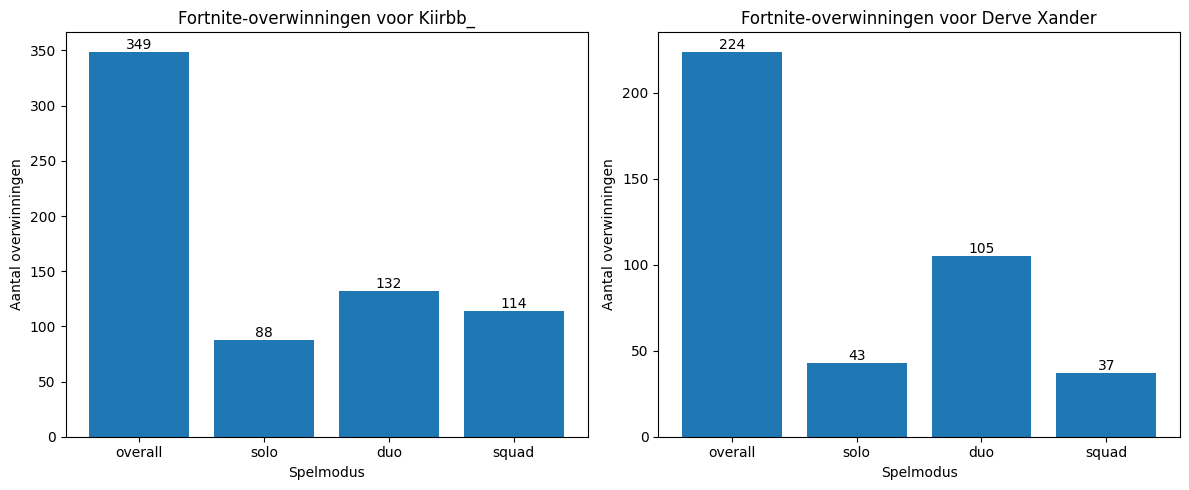

In [94]:
def plot_wins_bar_chart(ax, wins, player_name):
    stat_names = ['overall', 'solo', 'duo', 'squad']

    ax.bar(stat_names, wins)

    for i, win_count in enumerate(wins):
        ax.text(i, win_count, str(win_count), ha='center', va='bottom')

    ax.set_xlabel('Spelmodus')
    ax.set_ylabel('Aantal overwinningen')
    ax.set_title(f'Fortnite-overwinningen voor {player_name}')


def wins_main():
    global player_input
    get_player_input(1)
    get_player_input(2)

    player1_name = player_input.get(1)
    player2_name = player_input.get(2)

    if player1_name and player2_name:
        player1_stats = get_player_stats(player1_name)
        player2_stats = get_player_stats(player2_name)

        if player1_stats and player2_stats:
            overall_stats1, solo_stats1, duo_stats1, squad_stats1 = player1_stats
            overall_stats2, solo_stats2, duo_stats2, squad_stats2 = player2_stats

            wins1 = [stats.get('wins', 0) if stats is not None else 0 for stats in [overall_stats1, solo_stats1, duo_stats1, squad_stats1]]
            wins2 = [stats.get('wins', 0) if stats is not None else 0 for stats in [overall_stats2, solo_stats2, duo_stats2, squad_stats2]]

            fig, axs = plt.subplots(1, 2, figsize=(12, 5))

            plot_wins_bar_chart(axs[0], wins1, player1_name)
            plot_wins_bar_chart(axs[1], wins2, player2_name)

            plt.tight_layout()
            plt.show()

        else:
            print("Player information not available.")

if __name__ == "__main__":
    wins_main()

It is clearly visible how many games the player has won and how many of them are in a specific game mode.

### Horizontale Barplot

Often, you're also curious about a player's Kills per match.

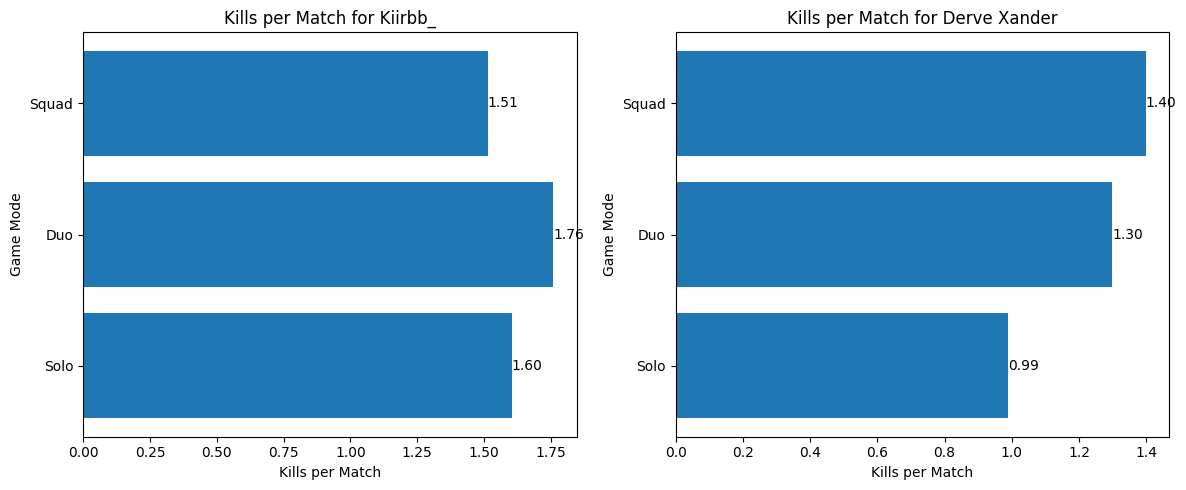

In [95]:
def calculate_kills_per_match(stats):
    if 'kills' in stats and 'matches' in stats and stats['matches'] > 0:
        return stats['kills'] / stats['matches']
    else:
        return 0

def plot_kills_per_match(ax, categories, values, player_name):
    ax.barh(categories, values)  # Verander hier "bar" naar "barh"

    for i, value in enumerate(values):
        ax.text(value, i, f'{value:.2f}', ha='left', va='center')  # Aanpassing hier

    ax.set_xlabel('Kills per Match')
    ax.set_ylabel('Game Mode')  # Aanpassing hier
    ax.set_title(f'Kills per Match for {player_name}')


def main():
    global player_input
    get_player_input(1)
    get_player_input(2)

    player1_name = player_input.get(1)
    player2_name = player_input.get(2)

    if player1_name and player2_name:
        player1_stats = get_player_stats(player1_name)
        player2_stats = get_player_stats(player2_name)

        if player1_stats and player2_stats:
            overall_stats1, solo_stats1, duo_stats1, squad_stats1 = player1_stats
            overall_stats2, solo_stats2, duo_stats2, squad_stats2 = player2_stats

            wins1 = [stats.get('wins', 0) if stats is not None else 0 for stats in [overall_stats1, solo_stats1, duo_stats1, squad_stats1]]
            wins2 = [stats.get('wins', 0) if stats is not None else 0 for stats in [overall_stats2, solo_stats2, duo_stats2, squad_stats2]]

            kills_per_match_solo_1 = calculate_kills_per_match(solo_stats1)
            kills_per_match_duo_1 = calculate_kills_per_match(duo_stats1)
            kills_per_match_squad_1 = calculate_kills_per_match(squad_stats1)

            kills_per_match_solo_2 = calculate_kills_per_match(solo_stats2)
            kills_per_match_duo_2 = calculate_kills_per_match(duo_stats2)
            kills_per_match_squad_2 = calculate_kills_per_match(squad_stats2)

            fig, axs = plt.subplots(1, 2, figsize=(12, 5))

            # Plot kills per match bar chart for player 1
            plot_kills_per_match(axs[0], ['Solo', 'Duo', 'Squad'], [kills_per_match_solo_1, kills_per_match_duo_1, kills_per_match_squad_1], player1_name)

            # Plot kills per match bar chart for player 2
            plot_kills_per_match(axs[1], ['Solo', 'Duo', 'Squad'], [kills_per_match_solo_2, kills_per_match_duo_2, kills_per_match_squad_2], player2_name)

            plt.tight_layout()
            plt.show()

        else:
            print("Player information not available.")

    else:
        print("Player 1 or Player 2 information not available.")

if __name__ == "__main__":
    main()

Here you can easily see what the average kills per match is for the player in each game mode.

### Winrate Barplot 

In the final visual, we will examine the players' Winrate.

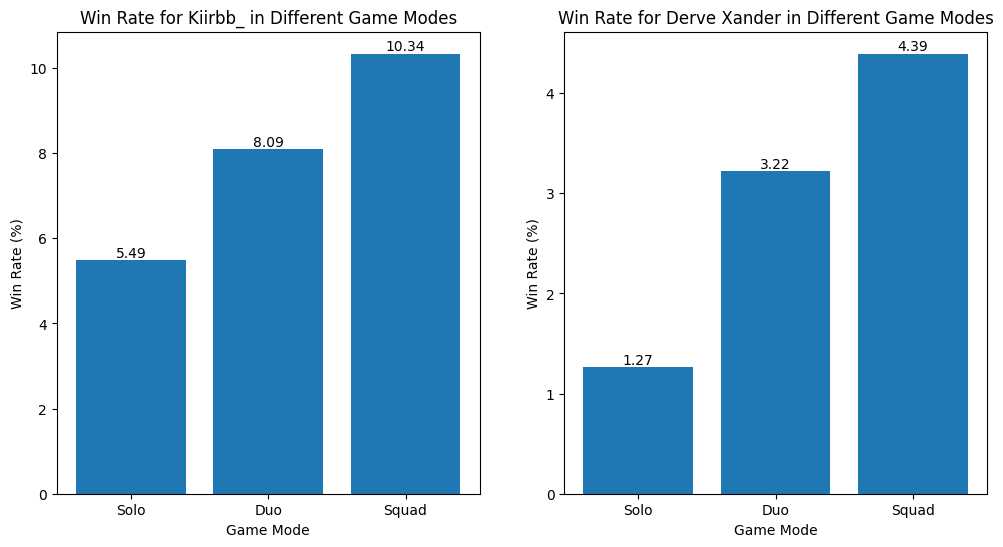

In [96]:
def calculate_win_rate(wins, matches):
    if matches == 0:
        return 0
    return (wins / matches) * 100

def plot_dual_win_rates(player_names, modes, win_rates_list):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    for idx, player_name in enumerate(player_names):
        axs[idx].bar(modes, win_rates_list[idx])
        axs[idx].set_xlabel('Game Mode')
        axs[idx].set_ylabel('Win Rate (%)')
        axs[idx].set_title(f'Win Rate for {player_name} in Different Game Modes')

        for i, rate in enumerate(win_rates_list[idx]):
            axs[idx].text(i, rate, f'{rate:.2f}', ha='center', va='bottom')

    plt.show()

def winrate_main():
    global player_input
    get_player_input(1)
    get_player_input(2)

    player1_name = player_input.get(1)
    player2_name = player_input.get(2)

    if player1_name and player2_name:
        player1_stats = get_player_stats(player1_name)
        player2_stats = get_player_stats(player2_name)

        if player1_stats and player2_stats:
            win_rates_list = []

            for player_stats in [player1_stats, player2_stats]:
                win_rates = []

                if player_stats[1]:
                    solo_wins = player_stats[1].get('wins', 0)
                    solo_matches = player_stats[1].get('matches', 0)
                    solo_win_rate = calculate_win_rate(solo_wins, solo_matches)
                    win_rates.append(solo_win_rate)

                if player_stats[2]:
                    duo_wins = player_stats[2].get('wins', 0)
                    duo_matches = player_stats[2].get('matches', 0)
                    duo_win_rate = calculate_win_rate(duo_wins, duo_matches)
                    win_rates.append(duo_win_rate)

                if player_stats[3]:
                    squad_wins = player_stats[3].get('wins', 0)
                    squad_matches = player_stats[3].get('matches', 0)
                    squad_win_rate = calculate_win_rate(squad_wins, squad_matches)
                    win_rates.append(squad_win_rate)

                win_rates_list.append(win_rates)

            modes = ['Solo', 'Duo', 'Squad']
            player_names = [player1_name, player2_name]
            plot_dual_win_rates(player_names, modes, win_rates_list)

        else:
            print("Player information not available.")

if __name__ == "__main__":
    winrate_main()

In another visual, you can already see what percentage of games the player has won. Now, let's take a closer look at the percentage of wins in each game mode. You can see that in the visual above.